# Task 03 - Decision Tree Classifier on Bank Marketing Dataset

## Objective
Build a **Decision Tree Classifier** to predict whether a customer will subscribe to a term deposit (purchase the product/service) based on demographic and behavioral data.

## Dataset
We are using the **Bank Marketing Dataset** provided by Prodigy InfoTech.  
Source: [Bank Marketing Dataset](https://github.com/Prodigy-InfoTech/data-science-datasets/tree/main/Task%203)

### Target Variable
- (yes/no): Whether the client subscribed to a term deposit


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv(r"bank-additional-full.csv",delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
df.rename(columns={'y':'subscribed_deposit'}, inplace=True)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.shape

(41188, 21)

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed_deposit'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

In [17]:
df.duplicated().sum()

12

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df_obj= df.select_dtypes(include='object').columns
df_num= df.select_dtypes(exclude='object').columns

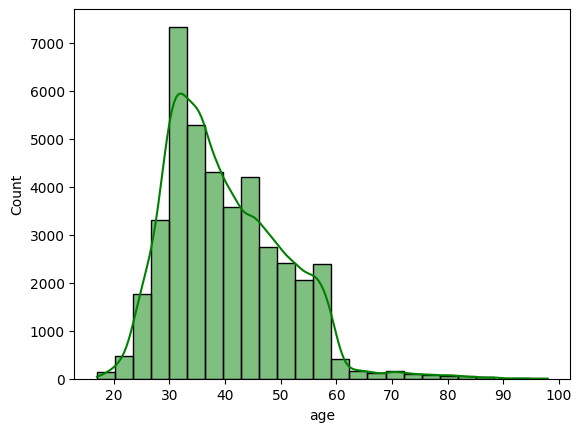

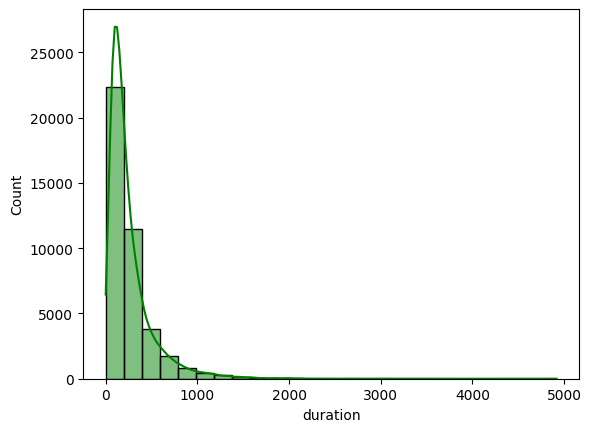

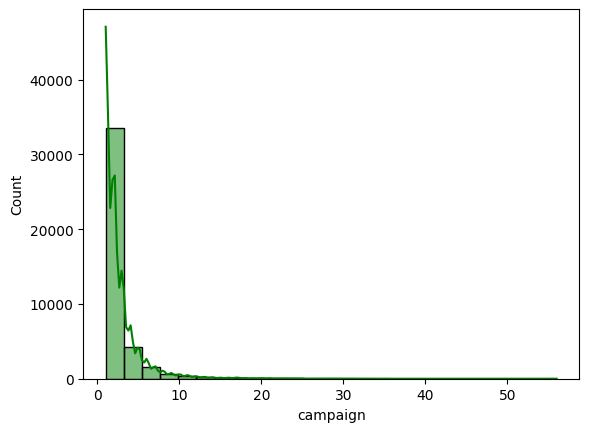

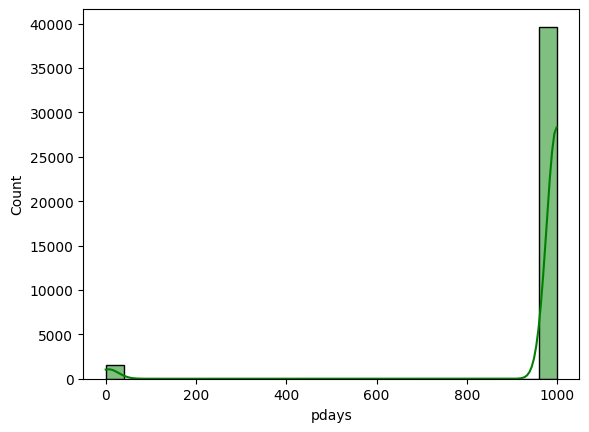

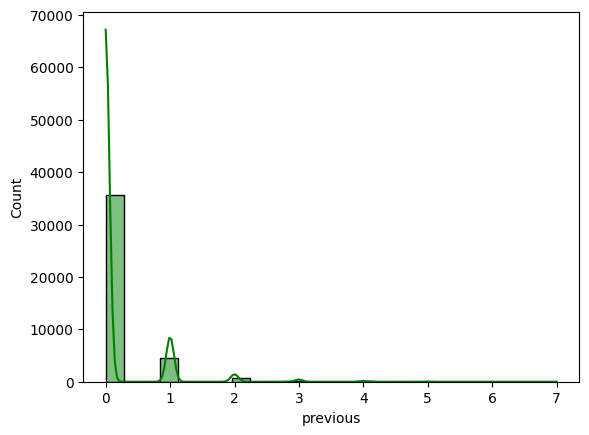

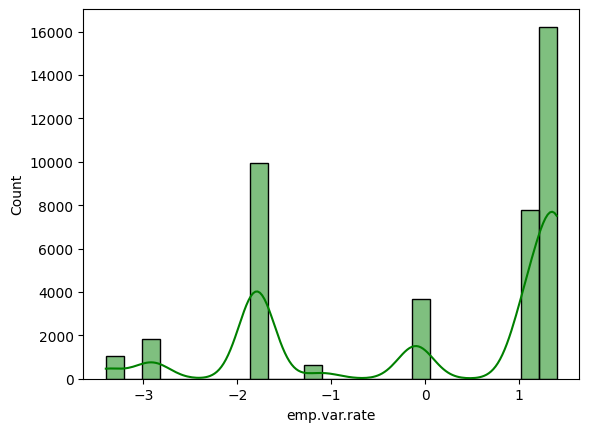

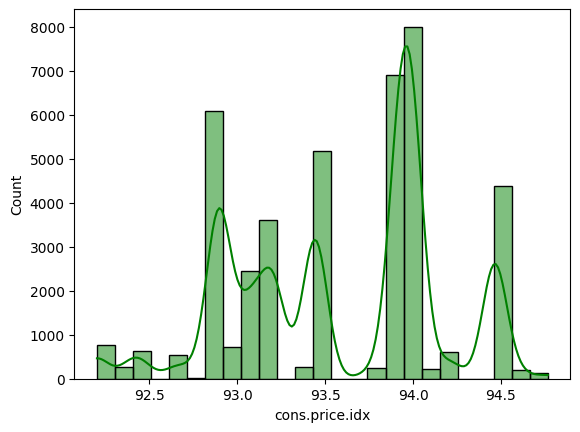

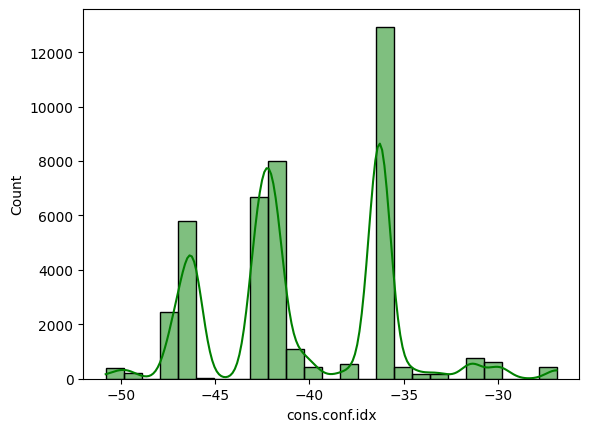

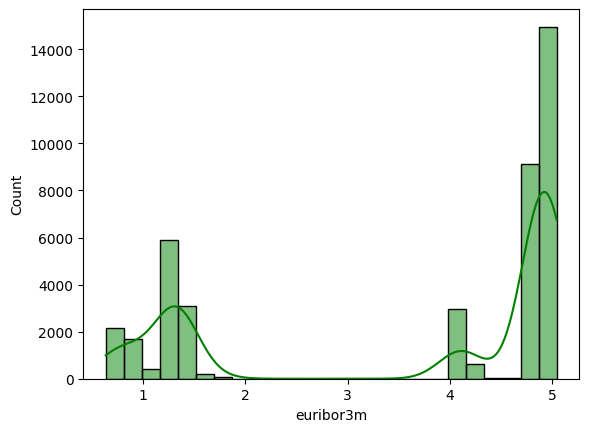

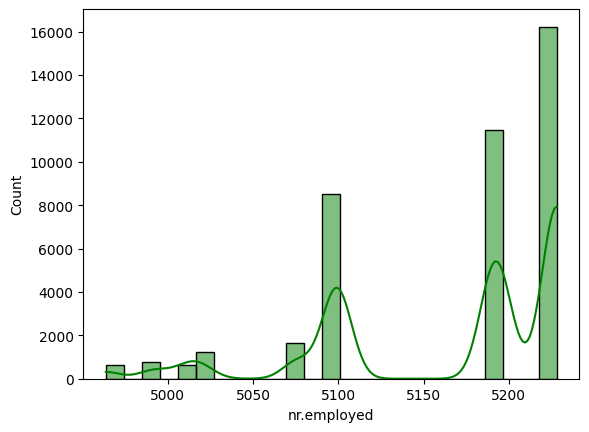

In [27]:
for feature in df_num:
    sns.histplot(x=feature,data=df,bins=25,kde=True,color='green')
    plt.show()

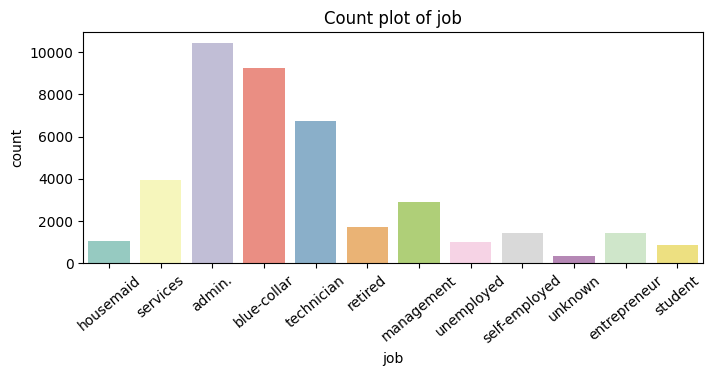

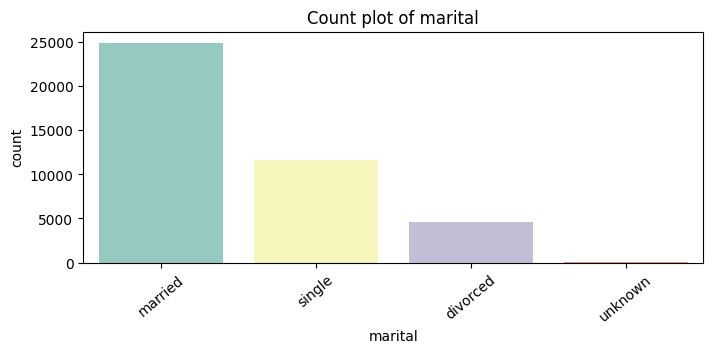

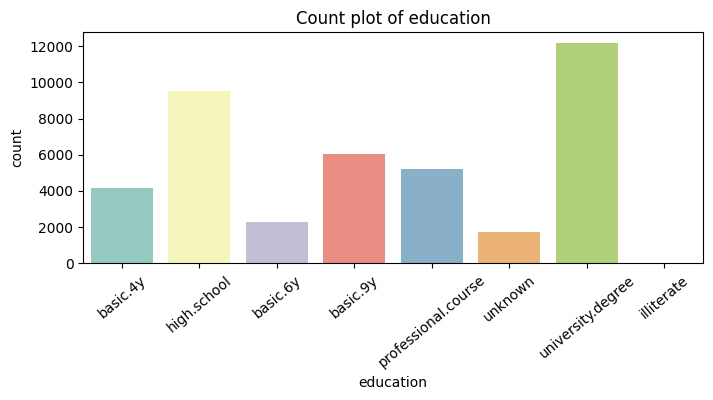

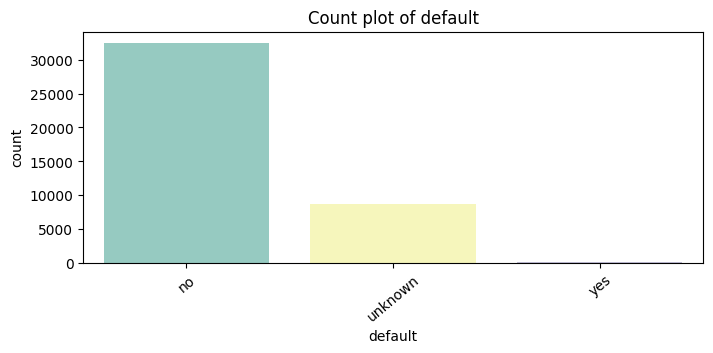

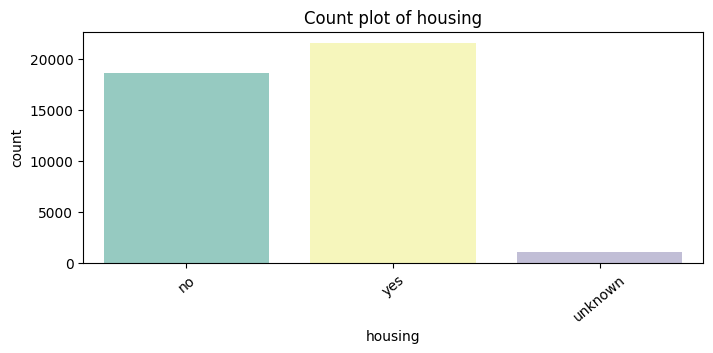

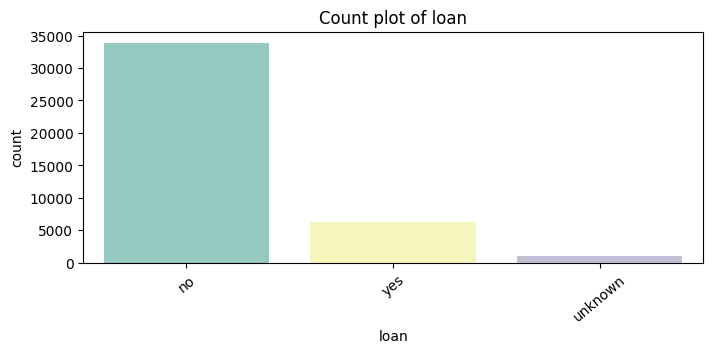

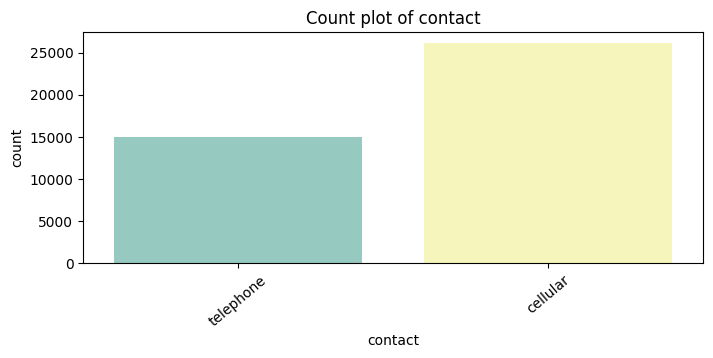

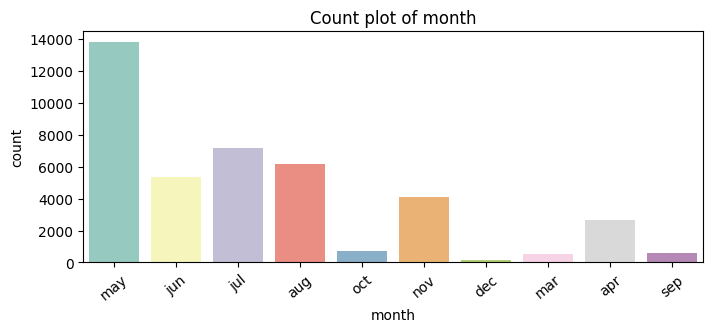

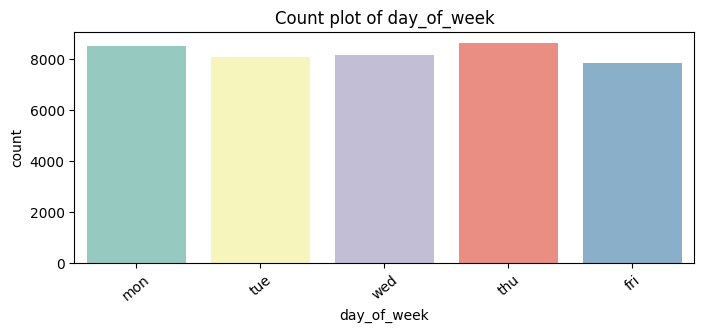

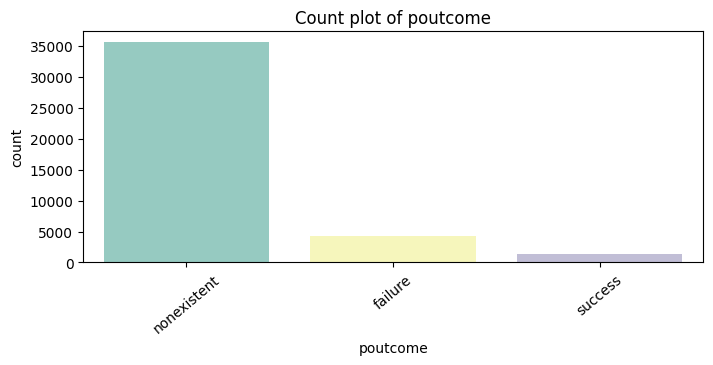

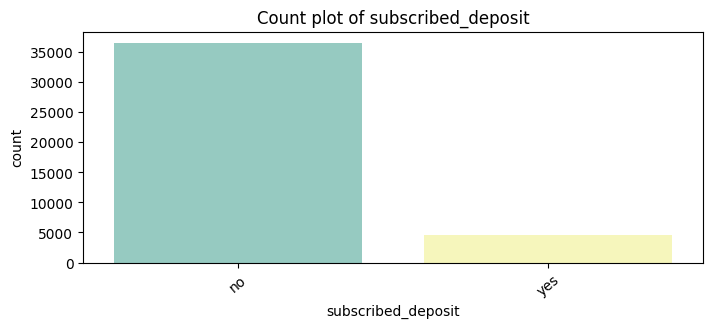

In [29]:
for feature in df_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='Set3')
    plt.xticks(rotation=40)
    plt.show()

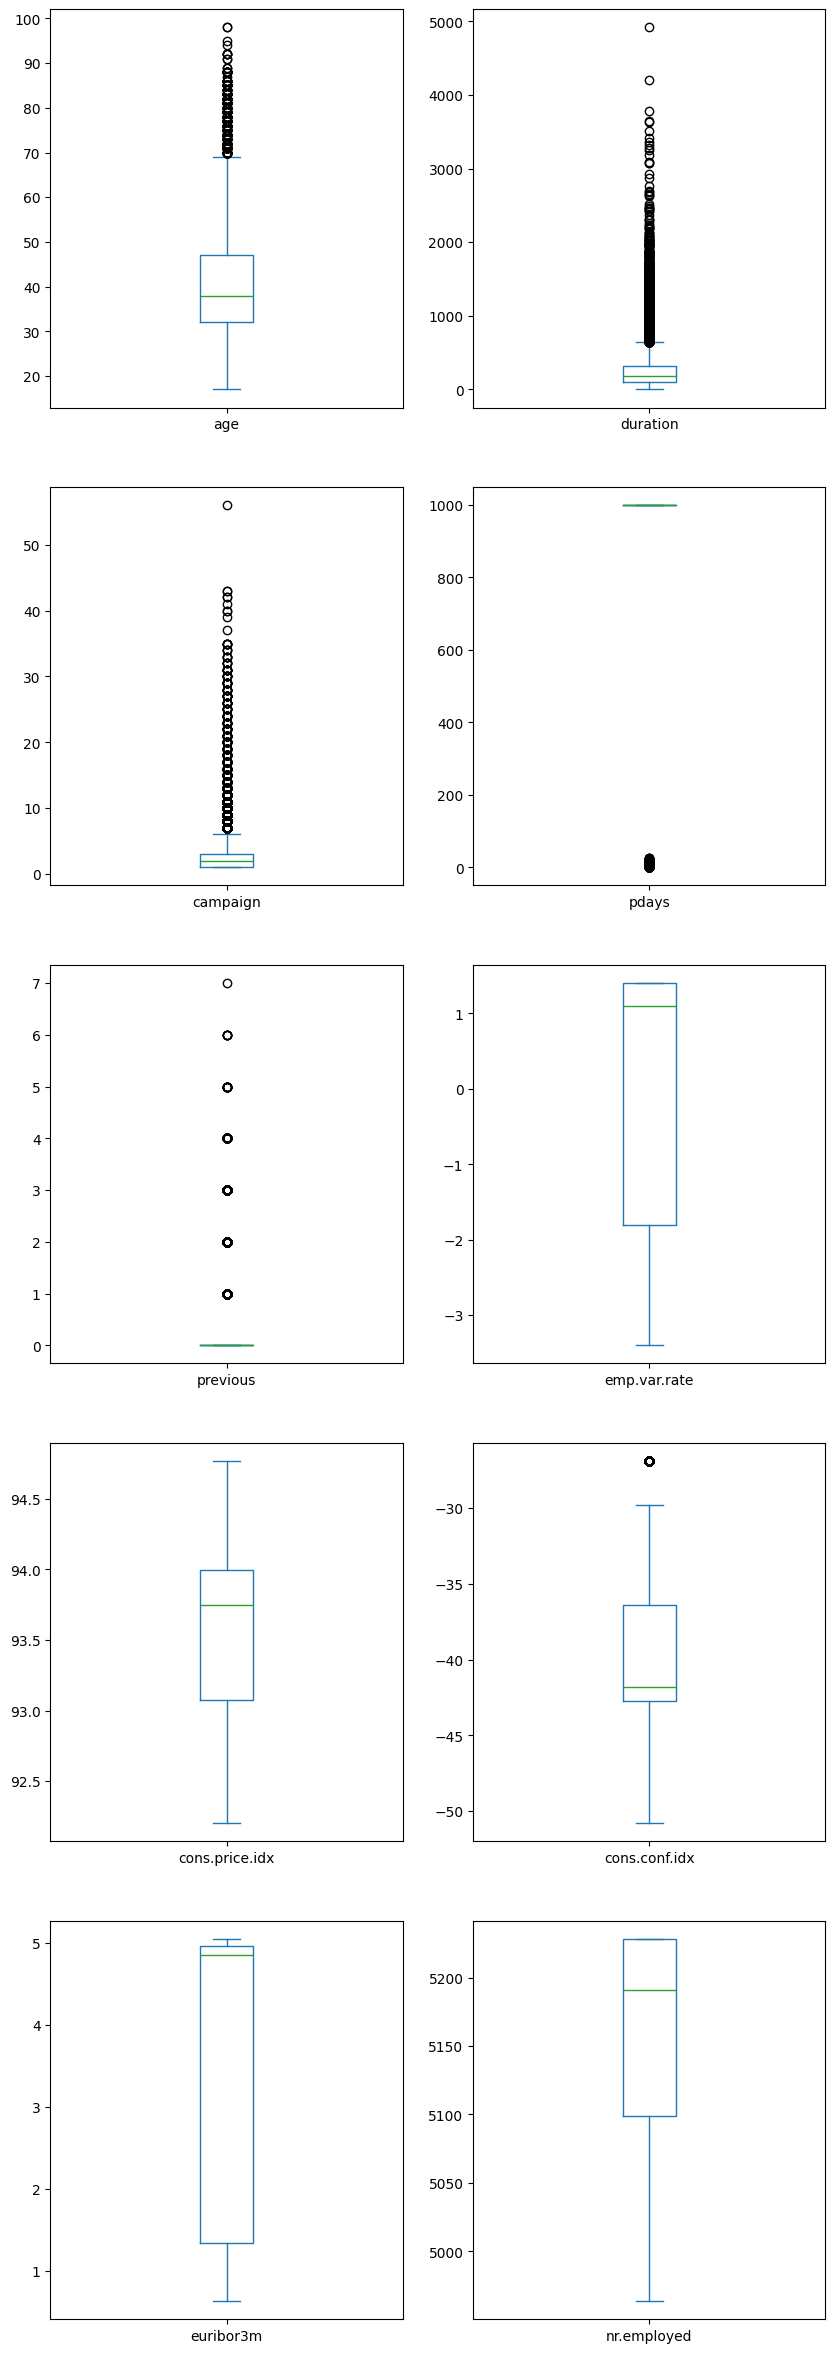

In [30]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

In [31]:
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

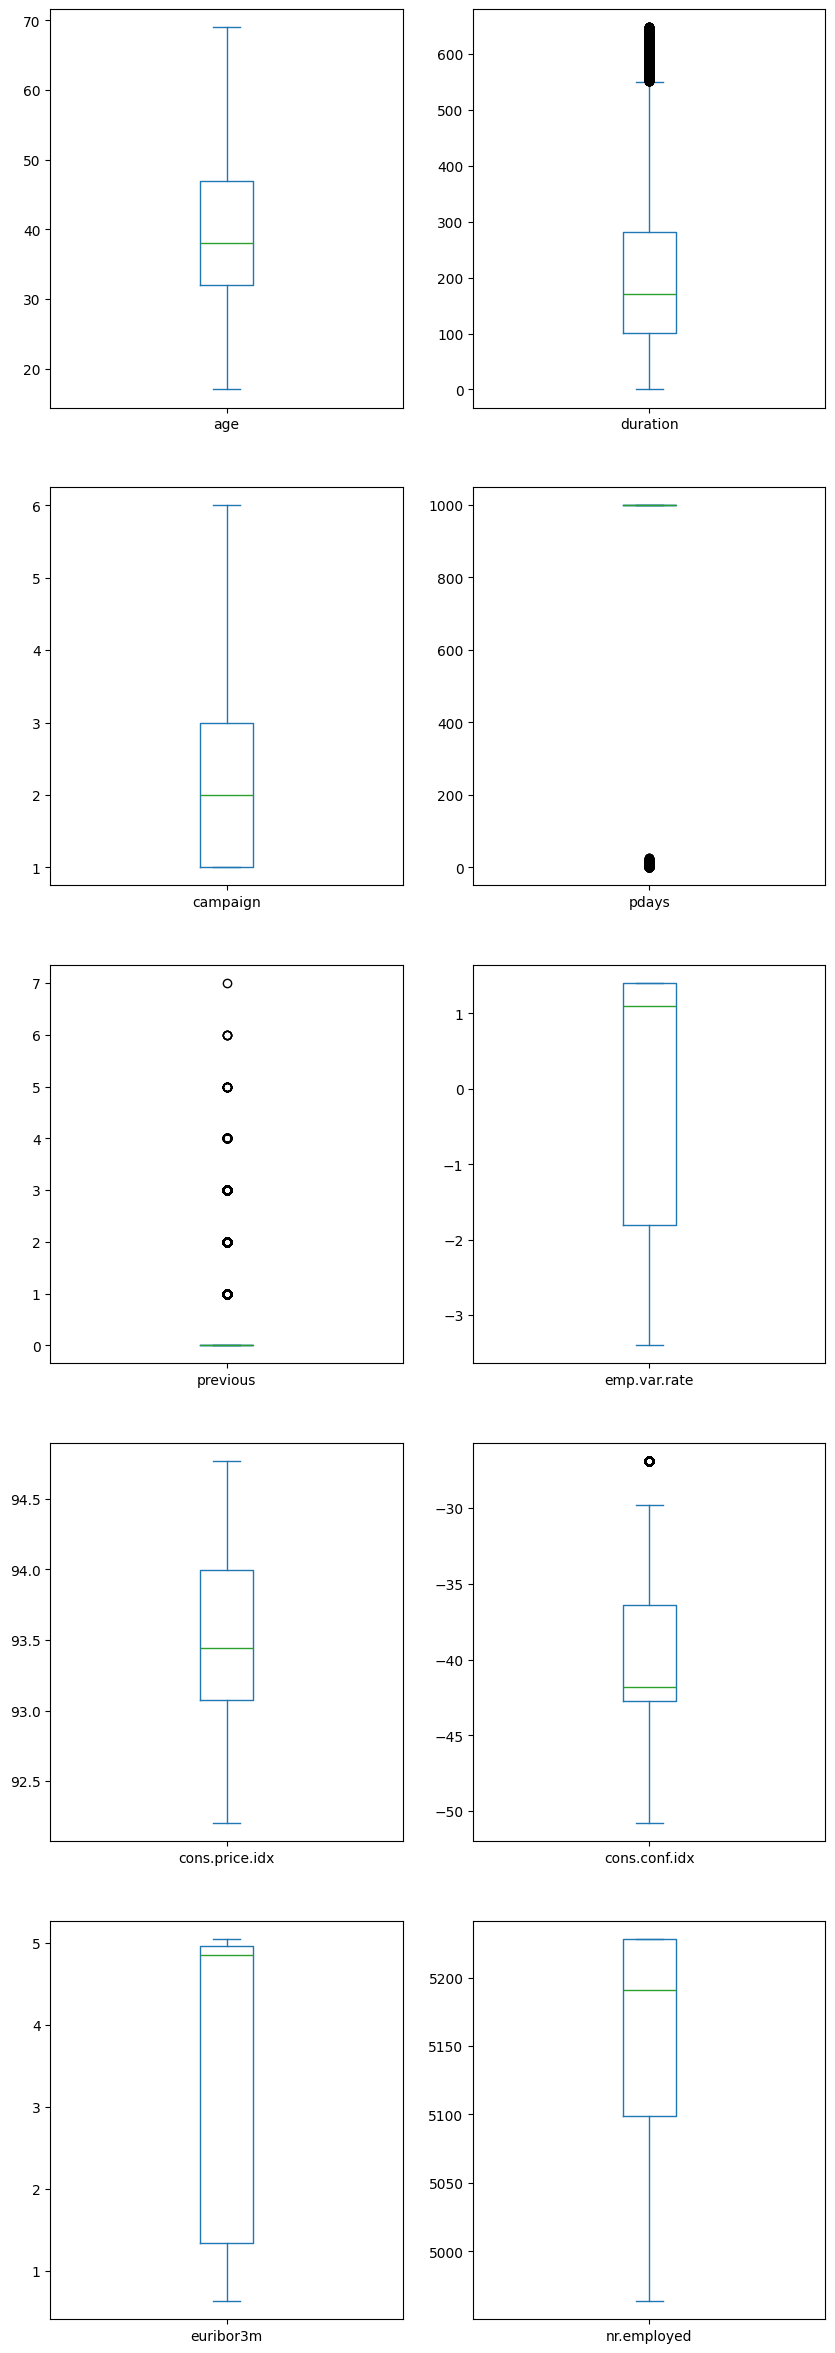

In [32]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

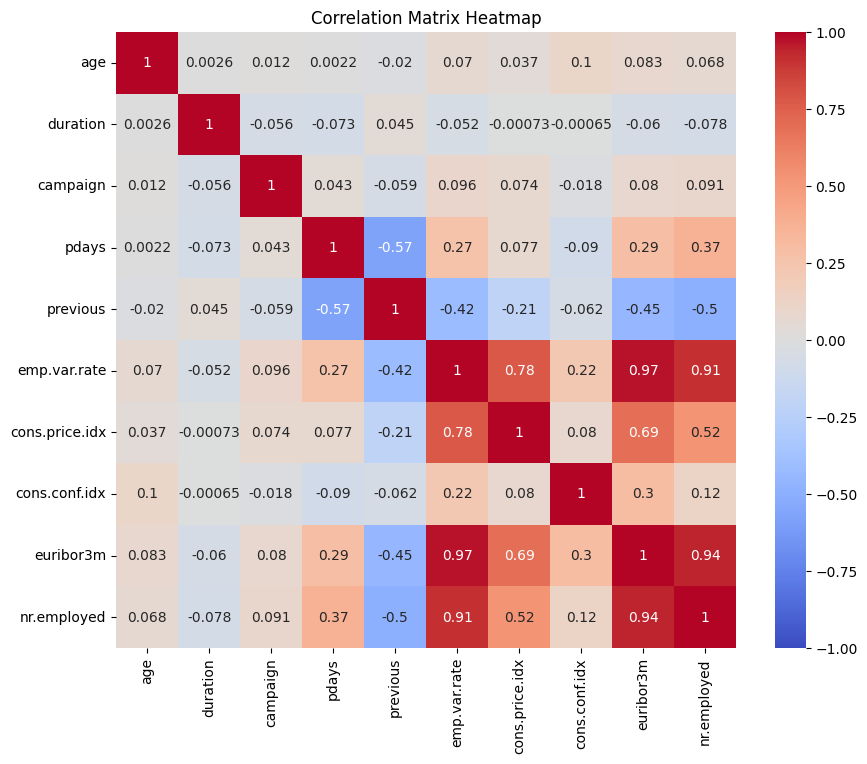

In [33]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [35]:
df1=df.copy()
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'subscribed_deposit'],
      dtype='object')

In [36]:
df1.shape

(35550, 18)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed_deposit
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,20,0,1,6,0,2,0,0,7,0,281,0,26,0,1,25,0,1
41182,12,10,2,0,0,2,0,0,7,0,112,0,9,1,2,25,0,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0


In [38]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)*100

subscribed_deposit
0    91.887482
1     8.112518
Name: proportion, dtype: float64

In [39]:
x = df_encoded.iloc[:,:-1]   
y = df_encoded.iloc[:,-1]

In [40]:
x.shape

(35550, 17)

In [41]:
y.shape

(35550,)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24885, 17)
(10665, 17)
(24885,)
(10665,)


In [43]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [44]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9369901547116737
Testing accuracy: 0.93314580403188


In [45]:
y_pred=dc.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.93314580403188


In [48]:
print(confusion_matrix(y_test,y_pred))

[[9599  214]
 [ 499  353]]


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9813
           1       0.62      0.41      0.50       852

    accuracy                           0.93     10665
   macro avg       0.79      0.70      0.73     10665
weighted avg       0.92      0.93      0.93     10665



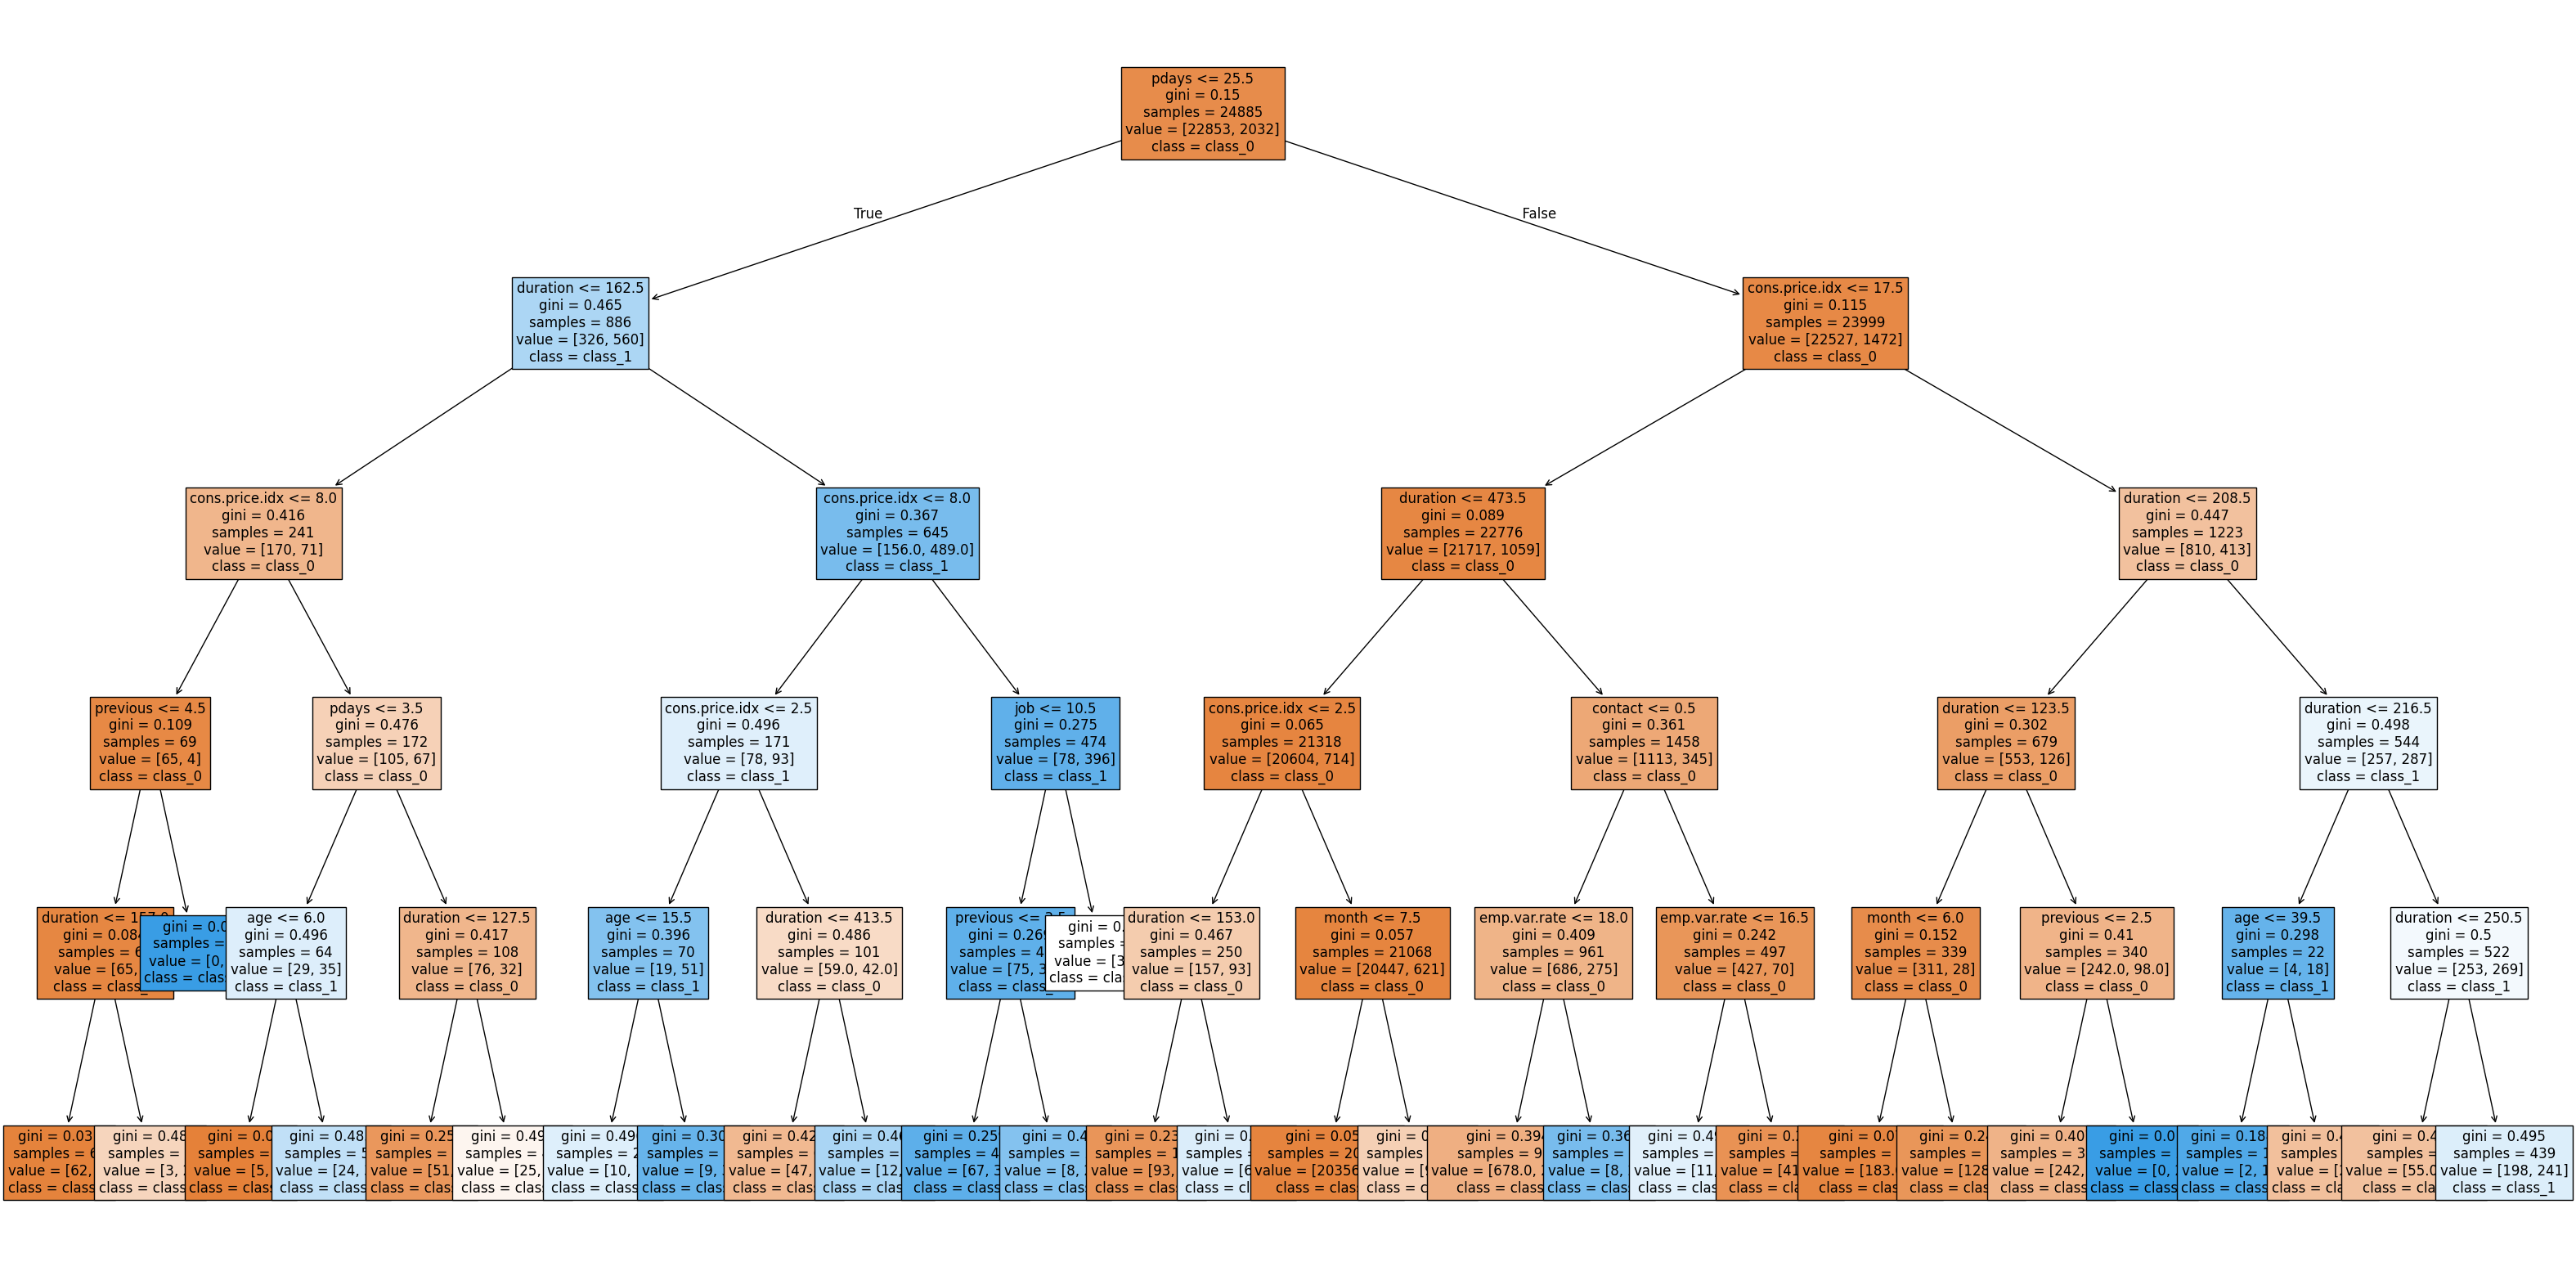

In [50]:
from sklearn.tree import plot_tree
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

In [51]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [53]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9359855334538879
Testing accuracy: 0.9316455696202531


In [54]:
y1_pred=dc1.predict(x_test)

In [55]:
print(accuracy_score(y_test,y1_pred))

0.9316455696202531


In [56]:
print(confusion_matrix(y_test,y1_pred))

[[9654  159]
 [ 570  282]]


In [58]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9813
           1       0.64      0.33      0.44       852

    accuracy                           0.93     10665
   macro avg       0.79      0.66      0.70     10665
weighted avg       0.92      0.93      0.92     10665



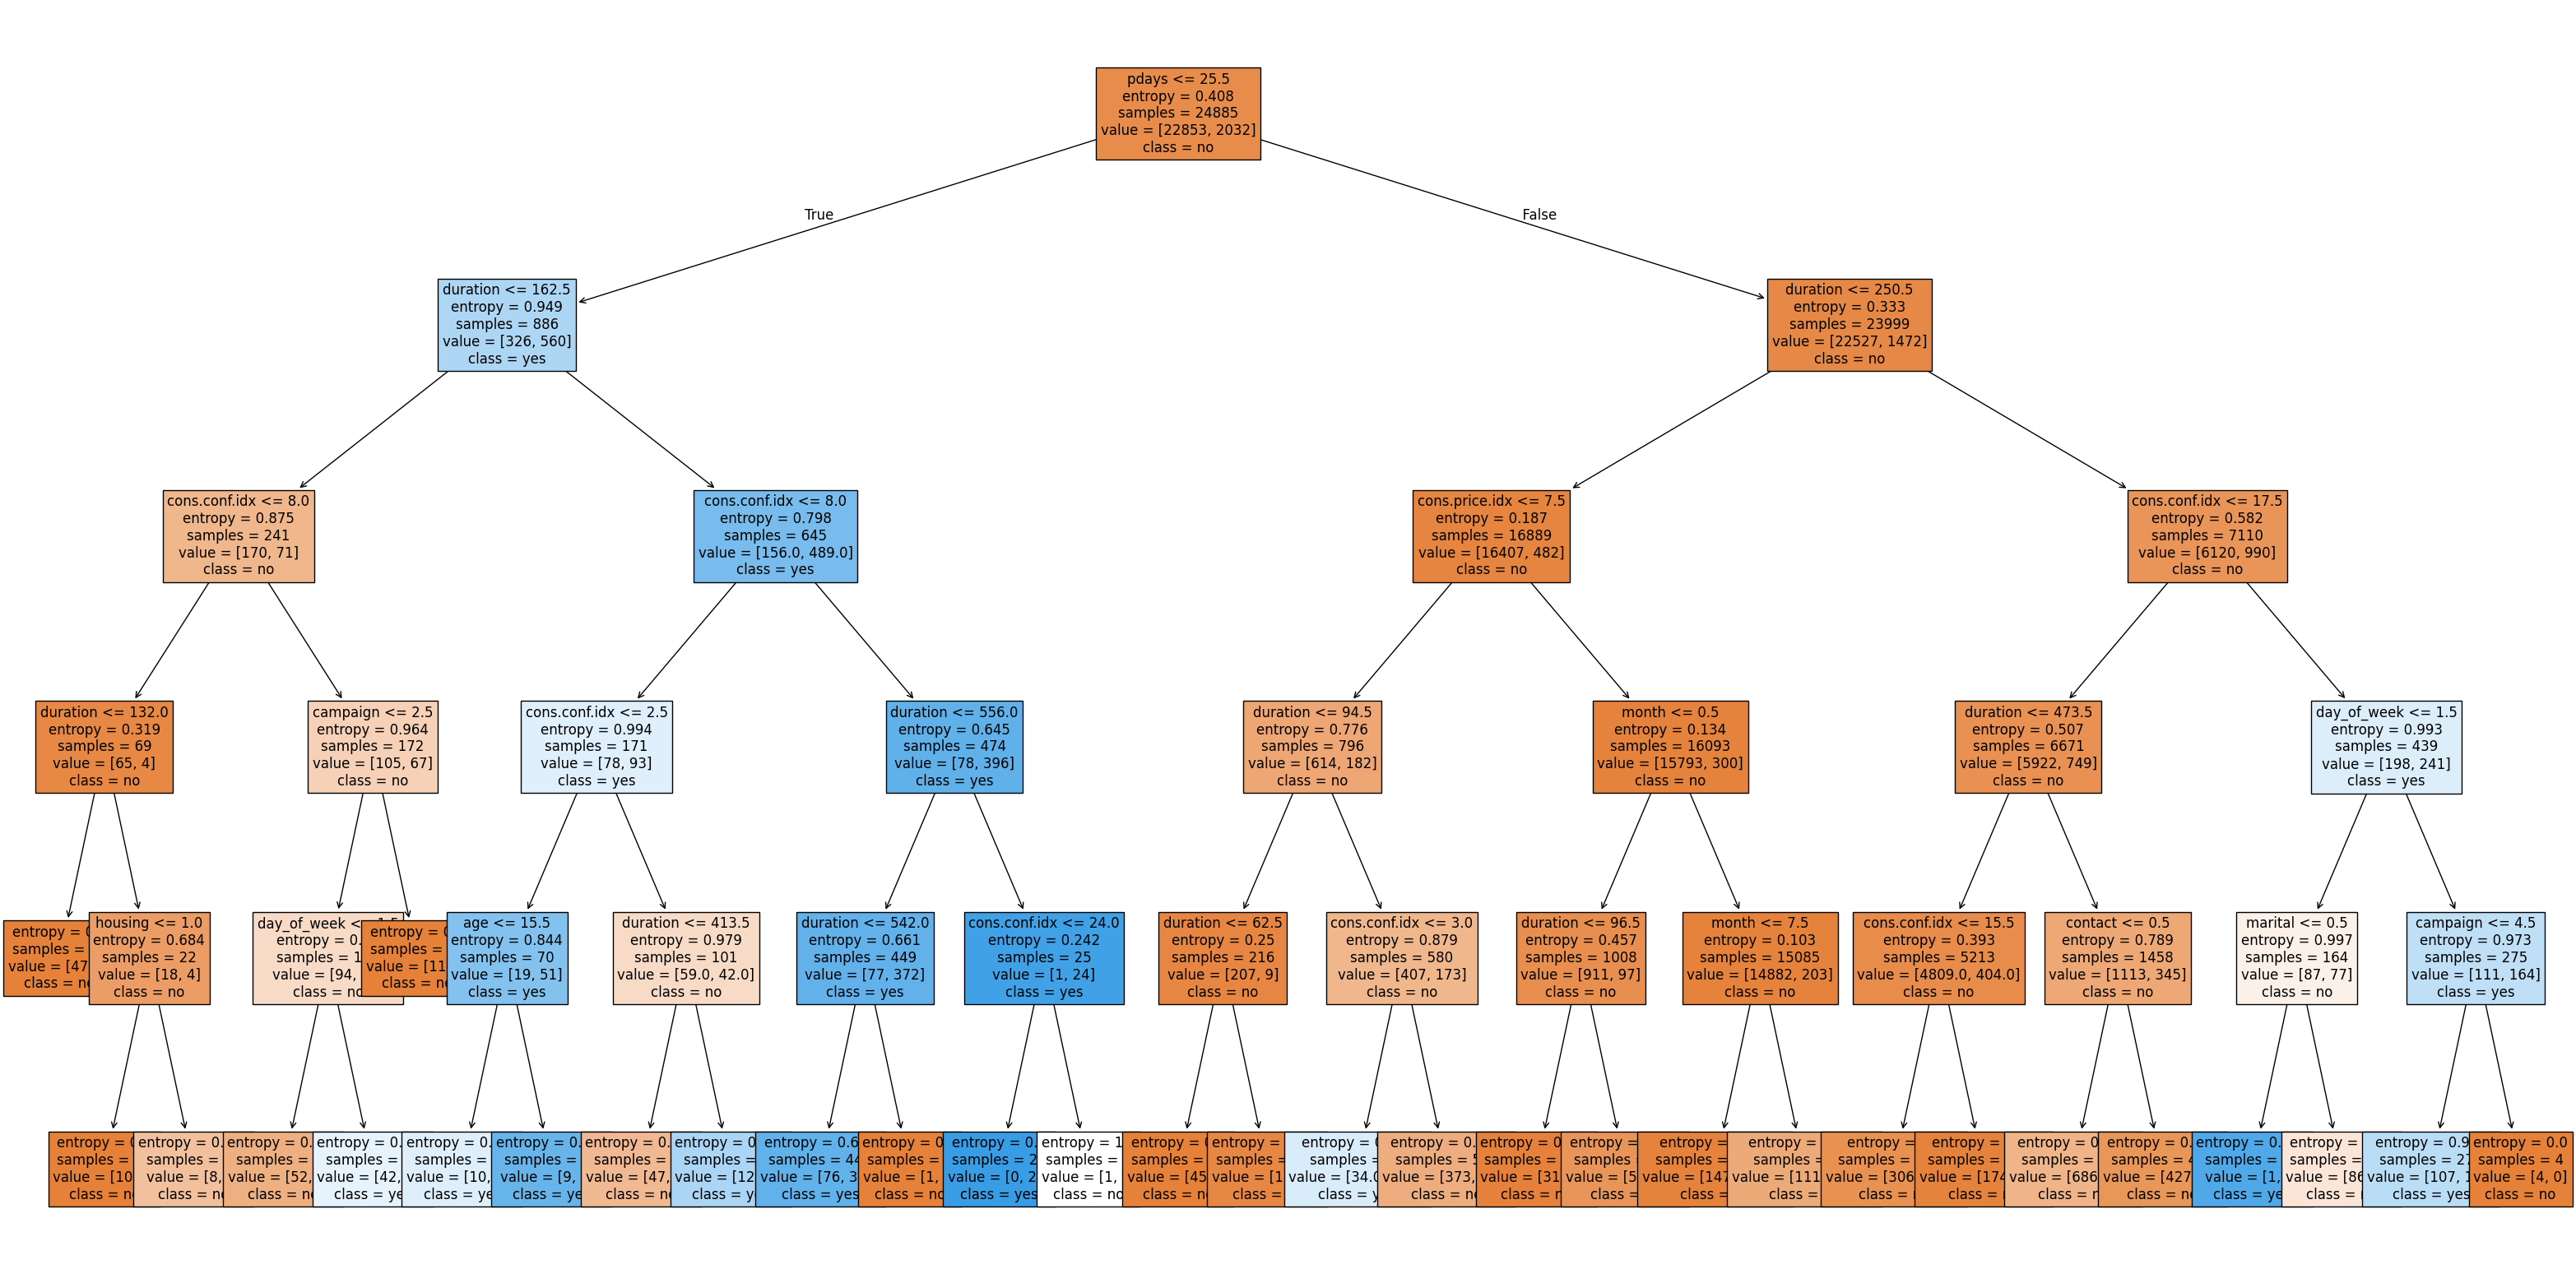

In [59]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()